In [1]:
!pip install hvplot
!pip install plotly

In [2]:
# dependencies .. lets put all the dependencies here
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import numpy as np
import datetime as dt
import hvplot.pandas
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


### Markdown Note: JBrooks - Using Simran's df2 as DataFrame

In [3]:
df2 = pd.read_csv('credit_card_transactions.csv')
df2.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [4]:
df2["trans_date_trans_time"] = pd.to_datetime(df2["trans_date_trans_time"], utc=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype              
---  ------                 --------------    -----              
 0   Unnamed: 0             1296675 non-null  int64              
 1   trans_date_trans_time  1296675 non-null  datetime64[ns, UTC]
 2   cc_num                 1296675 non-null  int64              
 3   merchant               1296675 non-null  object             
 4   category               1296675 non-null  object             
 5   amt                    1296675 non-null  float64            
 6   first                  1296675 non-null  object             
 7   last                   1296675 non-null  object             
 8   gender                 1296675 non-null  object             
 9   street                 1296675 non-null  object             
 10  city                   1296675 non-null  object             
 11  state                  1

In [5]:
data = df2
df2 = data.copy()
df2['trans_date'] = pd.to_datetime(df2['trans_date_trans_time'], utc=True).dt.date
df2['trans_year'] = pd.to_datetime(df2['trans_date_trans_time'], utc=True).dt.year
df2['trans_month'] = pd.to_datetime(df2['trans_date_trans_time'], utc=True).dt.month
df2['trans_day'] = pd.to_datetime(df2['trans_date_trans_time'], utc=True).dt.day
df2


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,trans_date,trans_year,trans_month,trans_day
0,0,2019-01-01 00:00:18+00:00,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,2019-01-01,2019,1,1
1,1,2019-01-01 00:00:44+00:00,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,2019-01-01,2019,1,1
2,2,2019-01-01 00:00:51+00:00,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0,2019-01-01,2019,1,1
3,3,2019-01-01 00:01:16+00:00,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,2019-01-01,2019,1,1
4,4,2019-01-01 00:03:06+00:00,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,2019-01-01,2019,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08+00:00,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN,2020-06-21,2020,6,21
1296671,1296671,2020-06-21 12:12:19+00:00,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0,2020-06-21,2020,6,21
1296672,1296672,2020-06-21 12:12:32+00:00,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0,2020-06-21,2020,6,21
1296673,1296673,2020-06-21 12:13:36+00:00,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0,2020-06-21,2020,6,21


### Markdown Note: JBrooks -determine age, create column for age, name categories with 10 year intervals

In [6]:
# Ensure 'dob' is a datetime object
df2['dob'] = pd.to_datetime(df2['dob'], errors='coerce')

# Calculate the 'Age' column
df2['age'] = df2['trans_year'] - df2['dob'].dt.year

# Define age groups based on the ranges provided
def age_description(age):
    if age < 18:
        return 'Age: 18 & Under'
    elif 19 <= age <= 28:
        return 'Age: 19-28'
    elif 29 <= age <= 38:
        return 'Age: 29-38'
    elif 39 <= age <= 48:
        return 'Age: 39-48'
    elif 49 <= age <= 58:
        return 'Age: 49-58'
    elif 59 <= age <= 68:
        return 'Age: 59-68'
    elif 69 <= age <= 78:
        return 'Age: 69-78'
    else:
        return 'Age: 79 & Older'

# Step 4: Create the 'Age Description' column
df2['age_description'] = df2['age'].apply(age_description)

# View the final dataframe with the new columns
df2[['age', 'age_description']].head()


,age,age_description
0,31,Age: 29-38
1,41,Age: 39-48
2,57,Age: 49-58
3,52,Age: 49-58
4,33,Age: 29-38


### Markdown Note: JBrooks -  count how many cc users in each age group

In [7]:
# Count the number of people in each age group
age_group_counts = df2['age_description'].value_counts()

# Display the counts
print(age_group_counts)


age_description
Age: 29-38         300943
Age: 39-48         300161
Age: 49-58         200411
Age: 19-28         181766
Age: 59-68         143773
Age: 69-78          78761
Age: 79 & Older     77430
Age: 18 & Under     13430
Name: count, dtype: int64


### Markdown Note: JBrooks -  visual / grpah for percentage of cc users each age group is.

In [8]:
import plotly.express as px

# Recalculate the age group counts
age_group_counts = df2['age_description'].value_counts().reset_index()

# Rename columns for clarity
age_group_counts.columns = ['age_group', 'count']

# Create a pie chart using plotly.express
fig = px.pie(
    age_group_counts, 
    names='age_group', 
    values='count',  # Use 'count' since 'total_spent' is not a valid column
    title='Percentage of Total Transactions Spent by Each Age Group',
    color_discrete_sequence=px.colors.qualitative.Set3,
    height=500, width=800
)

# Add a pull parameter to "explode" the slices
fig.update_traces(pull=[0.05] * len(age_group_counts))  # Pull each slice out by 5%

# Update layout for centered title and pie chart
fig.update_layout(
    title={
        'text': 'Percentage of Total Transactions Spent by Each Age Group',
        'y': 0.90,  # position the title closer to the top
        'x': 0.5,   # center the title horizontally
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend={
        'yanchor': 'middle',  # vertical centering
        'y': 0.5,             # legend is vertically centered
        'xanchor': 'left',     # move the legend to the right side
        'x': 1.3              # move the legend further right to avoid overlapping the pie chart
    },
    margin=dict(l=100)  # adds 100px left margin to move the pie chart to the left
)

# Display the pie chart
fig.show()




### Markdown Note: JBrooks -  spending amounts per age group

In [9]:
import plotly.express as px

# Group the data by 'age_description' and sum the 'amt' for each group
age_group_spending = df2.groupby('age_description')['amt'].sum().reset_index()

# Rename columns for clarity
age_group_spending.columns = ['age_group', 'total_spent']

# Create a pie chart using plotly.express
fig = px.pie(
    age_group_spending, 
    names='age_group', 
    values='total_spent', 
    title='Percentage of Total Transactions Spent by Each Age Group',
    color_discrete_sequence=px.colors.qualitative.Set3,
    height=500, width=800
)

# Add a pull parameter to "explode" the slices
fig.update_traces(pull=[0.05] * len(age_group_spending))  # Pull each slice out by 5%

# Update layout for centered title and pie chart
fig.update_layout(
    title={
        'text': 'Percentage of Total Transactions Spent by Each Age Group',
        'y': 0.90,  # position the title closer to the top
        'x': 0.56,   # center the title horizontally
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend={
        'yanchor': 'middle',  # vertical centering
        'y': 0.5,             # legend is vertically centered
        'xanchor': 'left',     # move the legend to the right side
        'x': 1.1              # move the legend further right to avoid overlapping the pie chart
    },
    margin=dict(l=100)  # adds 100px left margin to move the pie chart to the left
)

# Display the pie chart
fig.show()



### Markdown Note: JBrooks -  top 3 spend categories by age group

In [10]:
import pandas as pd
import plotly.express as px

# Group by 'age_description' and 'category', then sum the amount spent
grouped = df2.groupby(['age_description', 'category'])['amt'].sum().reset_index()

# For each age group, sort the spending by category and take the top 3
top_3_categories = grouped.groupby('age_description').apply(
    lambda x: x.nlargest(3, 'amt')
).reset_index(drop=True)

# Create a bar chart using plotly
fig = px.bar(
    top_3_categories, x='age_description', y='amt', color='category', 
    title="Top 3 Spending Categories by Age Group",
    labels={'amt': 'Total Spend', 'age_description': 'Age Group'},
    height=500, width=800
)

fig.show()



C:\Users\reddo\AppData\Local\Temp\ipykernel_18700\1357710375.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



### Markdown Note: JBrooks - spend amount on travel for each age group

In [11]:
import plotly.express as px

# Filter the data for the 'Travel' category
travel_spending = df2[df2['category'] == 'travel'].groupby('age_description')['amt'].sum().reset_index()

# Create a bar chart using plotly for Travel spending
fig = px.bar(
    travel_spending, x='age_description', y='amt', 
    title="Total Spending on Travel by Age Group",
    labels={'amt': 'Total Spend on Travel', 'age_description': 'Age Group'},
    height=500, width=800
)

fig.show()


### Markdown Note: JBrooks - the percentage of Travel spend against total spend by age group

In [12]:
import plotly.express as px

# Calculate total spending per age group
total_spending_by_age = df2.groupby('age_description')['amt'].sum().reset_index()

# Calculate travel spending per age group
travel_spending_by_age = df2[df2['category'] == 'travel'].groupby('age_description')['amt'].sum().reset_index()

# Merge both dataframes to calculate the percentage of travel spending
spending_comparison = pd.merge(travel_spending_by_age, total_spending_by_age, on='age_description', suffixes=('_travel', '_total'))

# Calculate the percentage of travel spending for each age group
spending_comparison['travel_percentage'] = (spending_comparison['amt_travel'] / spending_comparison['amt_total']) * 100

# Create a pie chart using plotly for the percentage of travel spending
fig = px.pie(
    spending_comparison, 
    values='travel_percentage', 
    names='age_description', 
    title="Percentage of Travel Spending as Part of Total Spending by Age Group",
    height=500, width=800
)

# Add a pull parameter to "explode" the slices
fig.update_traces(pull=[0.05] * len(spending_comparison))  # Pull each slice out by 5%

# Update layout to center title and adjust the pie chart position to the left
fig.update_layout(
    title={
        'text': "Percentage of Travel Spending as Part of Total Spending by Age Group",
        'y':0.90,  # position of the title from bottom to top (0-1 scale)
        'x':0.5,   # center the title horizontally
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend={
        'yanchor': 'middle',  # vertical centering
        'y': 0.5,             # legend is vertically centered
        'xanchor': 'left',     # move the legend to the right side
        'x': 1.3              # move the legend further right to avoid overlapping the pie chart
    },
    margin=dict(l=100)  # adds 100px left margin to move the pie chart to the left
)

# Display the chart
fig.show()


### Markdown Note: JBrooks - the next several cells break out spending by category for each age group with a hover of $ amount spend

In [13]:
import plotly.express as px

# Step 1: Filter data for the under-18 group
under_18_data = df2[df2['age_description'] == 'Age: 18 & Under']

# Step 2: Group the data by category and calculate total spend
under_18_spend_by_category = under_18_data.groupby('category')['amt'].sum().reset_index()

# Step 3: Calculate the percentage of total spend for each category
total_spend_under_18 = under_18_spend_by_category['amt'].sum()
under_18_spend_by_category['percentage'] = (under_18_spend_by_category['amt'] / total_spend_under_18) * 100

# Round percentage to one decimal place for display
under_18_spend_by_category['percentage'] = under_18_spend_by_category['percentage'].round(1)

# Keep 'amt' as numerical for plotting but create a formatted version for hover
under_18_spend_by_category['amt_formatted'] = under_18_spend_by_category['amt'].round(2).map('${:,.2f}'.format)

# Step 4: Create a pie chart using Plotly Express
fig = px.pie(
    under_18_spend_by_category, 
    names='category', 
    values='amt',  # Keep this numerical for plotting
    title='Age: 18 & Under: Spending by Category',
    hover_data=['amt_formatted'],  # Only show Total Spend on hover
    labels={'amt_formatted': 'Total Spend'}
)

# Customize the chart with percentages on the slices and display total spend on hover
fig.update_traces(
    textposition='inside', 
    textinfo='percent+label', 
    hovertemplate='Total Spend: $%{value:,.2f}', 
    pull=[0.05] * len(under_18_spend_by_category),  # Pull out each slice slightly
    marker=dict(line=dict(color='white', width=2))  # Add white border around each slice
    )

# Update the layout for better alignment of the pie chart and legend
fig.update_layout(
    width=800,  # Adjust width
    height=500,  # Adjust height
    title={
        'text': 'Age: 18 & Under: Spending by Category',
        'y':0.90,  # position of the title from bottom to top (0-1 scale)
        'x':0.56,   # center the title horizontally
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend={
        'yanchor': 'middle',  # vertical centering
        'y': 0.5,             # legend is vertically centered
        'xanchor': 'left',     # move the legend to the right side
        'x': .8             # move the legend further right to avoid overlapping the pie chart
    },
    margin=dict(l=0  # adds 100px left margin to move the pie chart to the left
))
# Display the chart
fig.show()


In [14]:
# Filter the data for the 19-28 age group
young_adults_data = df2[df2['age_description'] == 'Age: 19-28']

# Calculate the total spend by category for the 19-28 age group
young_adults_spending = young_adults_data.groupby('category')['amt'].sum().reset_index()

# Sort the values for a cleaner chart presentation
young_adults_spending = young_adults_spending.sort_values(by='amt', ascending=False)

# Create a pie chart using plotly
fig = px.pie(
    young_adults_spending, 
    names='category', 
    values='amt', 
    title='Age: 19-28: Spending by Category', 
    hover_data={'amt': ':.2f'},
    labels={'amt': 'Total Spend'}
)

# Customize the chart with percentages on the slices and display total spend on hover
fig.update_traces(
    textposition='inside', 
    textinfo='percent+label', 
    hovertemplate='Total Spend: $%{value:,.2f}', 
    pull=[0.05] * len(young_adults_spending),  # Pull out each slice slightly
    marker=dict(line=dict(color='white', width=2))  # Add white border around each slice
)

# Update the layout for better alignment of the pie chart and legend
fig.update_layout(
    width=800,  # Adjust width
    height=500,  # Adjust height
    title={
        'text': 'Age: 19-28: Spending by Category',
        'y':0.90,  # position of the title from bottom to top (0-1 scale)
        'x':0.56,   # center the title horizontally
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend={
        'yanchor': 'middle',  # vertical centering
        'y': 0.5,             # legend is vertically centered
        'xanchor': 'left',     # move the legend to the right side
        'x': .8             # move the legend further right to avoid overlapping the pie chart
    },
    margin=dict(l=0  # adds 100px left margin to move the pie chart to the left
))
# Display the chart
fig.show()


In [15]:
# Filter the data for the 29-38 age group
early_career_data = df2[df2['age_description'] == 'Age: 29-38']

# Calculate the total spend by category for the 29-38 age group
early_career_spending = early_career_data.groupby('category')['amt'].sum().reset_index()

# Sort the values for a cleaner chart presentation
early_career_spending = early_career_spending.sort_values(by='amt', ascending=False)

# Create a pie chart using plotly
fig = px.pie(
    early_career_spending, 
    names='category', 
    values='amt', 
    title='Age: 29-38: Spending by Category', 
    hover_data={'amt': ':.2f'},
    labels={'amt': 'Total Spend'}
)

# Customize the chart with percentages on the slices and display total spend on hover
fig.update_traces(
    textposition='inside', 
    textinfo='percent+label', 
    hovertemplate='Total Spend: $%{value:,.2f}', 
    pull=[0.05] * len(early_career_spending),  # Pull out each slice slightly
    marker=dict(line=dict(color='white', width=2))  # Add white border around each slice
)

# Update the layout for better alignment of the pie chart and legend
fig.update_layout(
    width=800,  # Adjust width
    height=500,  # Adjust height
    title={
        'text': 'Age: 29-38: Spending by Category',
        'y':0.90,  # position of the title from bottom to top (0-1 scale)
        'x':0.56,   # center the title horizontally
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend={
        'yanchor': 'middle',  # vertical centering
        'y': 0.5,             # legend is vertically centered
        'xanchor': 'left',     # move the legend to the right side
        'x': .8             # move the legend further right to avoid overlapping the pie chart
    },
    margin=dict(l=0  # adds 100px left margin to move the pie chart to the left
))
# Display the chart
fig.show()


In [16]:
# Filter the data for the 39-48 age group
mid_life_data = df2[df2['age_description'] == 'Age: 39-48']

# Calculate the total spend by category for the 39-48 age group
mid_life_spending = mid_life_data.groupby('category')['amt'].sum().reset_index()

# Sort the values for a cleaner chart presentation
mid_life_spending = mid_life_spending.sort_values(by='amt', ascending=False)

# Create a pie chart using plotly
fig = px.pie(
    mid_life_spending, 
    names='category', 
    values='amt', 
    title='Age: 39-48: Spending by Category', 
    hover_data={'amt': ':.2f'},
    labels={'amt': 'Total Spend'}
)

# Customize the chart with percentages on the slices and display total spend on hover
fig.update_traces(
    textposition='inside', 
    textinfo='percent+label', 
    hovertemplate='Total Spend: $%{value:,.2f}', 
    pull=[0.05] * len(mid_life_spending),  # Pull out each slice slightly
    marker=dict(line=dict(color='white', width=2))  # Add white border around each slice
)

# Update the layout for better alignment of the pie chart and legend
fig.update_layout(
    width=800,  # Adjust width
    height=500,  # Adjust height
    title={
        'text': 'Age: 39-48: Spending by Category',
        'y':0.90,  # position of the title from bottom to top (0-1 scale)
        'x':0.56,   # center the title horizontally
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend={
        'yanchor': 'middle',  # vertical centering
        'y': 0.5,             # legend is vertically centered
        'xanchor': 'left',     # move the legend to the right side
        'x': .8             # move the legend further right to avoid overlapping the pie chart
    },
    margin=dict(l=0  # adds 100px left margin to move the pie chart to the left
))
# Display the chart
fig.show()


In [17]:
# Filter the data for the 49-58 age group
seasoned_adults_data = df2[df2['age_description'] == 'Age: 49-58']

# Calculate the total spend by category for the 49-58 age group
seasoned_adults_spending = seasoned_adults_data.groupby('category')['amt'].sum().reset_index()

# Sort the values for a cleaner chart presentation
seasoned_adults_spending = seasoned_adults_spending.sort_values(by='amt', ascending=False)

# Create a pie chart using plotly
fig = px.pie(
    seasoned_adults_spending, 
    names='category', 
    values='amt', 
    title='Age: 49-58: Spending by Category', 
    hover_data={'amt': ':.2f'},
    labels={'amt': 'Total Spend'}
)

# Customize the chart with percentages on the slices and display total spend on hover
fig.update_traces(
    textposition='inside', 
    textinfo='percent+label', 
    hovertemplate='Total Spend: $%{value:,.2f}', 
    pull=[0.05] * len(seasoned_adults_spending),  # Pull out each slice slightly
    marker=dict(line=dict(color='white', width=2))  # Add white border around each slice
)

# Update the layout for better alignment of the pie chart and legend
fig.update_layout(
    width=800,  # Adjust width
    height=500,  # Adjust height
    title={
        'text': 'Age: 49-58: Spending by Category', 
        'y':0.90,  # position of the title from bottom to top (0-1 scale)
        'x':0.56,   # center the title horizontally
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend={
        'yanchor': 'middle',  # vertical centering
        'y': 0.5,             # legend is vertically centered
        'xanchor': 'left',     # move the legend to the right side
        'x': .8             # move the legend further right to avoid overlapping the pie chart
    },
    margin=dict(l=0  # adds 100px left margin to move the pie chart to the left
))
# Display the chart
fig.show()


In [18]:
# Filter the data for the 59-68 age group
early_retirees_data = df2[df2['age_description'] == 'Age: 59-68']

# Calculate the total spend by category for the 59-68 age group
early_retirees_spending = early_retirees_data.groupby('category')['amt'].sum().reset_index()

# Sort the values for a cleaner chart presentation
early_retirees_spending = early_retirees_spending.sort_values(by='amt', ascending=False)

# Create a pie chart using plotly
fig = px.pie(
    early_retirees_spending, 
    names='category', 
    values='amt', 
    title='Age: 59-68: Spending by Category', 
    hover_data={'amt': ':.2f'},
    labels={'amt': 'Total Spend'}
)

# Customize the chart with percentages on the slices and display total spend on hover
fig.update_traces(
    textposition='inside', 
    textinfo='percent+label', 
    hovertemplate='Total Spend: $%{value:,.2f}', 
    pull=[0.05] * len(early_retirees_spending),  # Pull out each slice slightly
    marker=dict(line=dict(color='white', width=2))  # Add white border around each slice
)

# Update the layout for better alignment of the pie chart and legend
fig.update_layout(
    width=800,  # Adjust width
    height=500,  # Adjust height
    title={
        'text': 'Age: 59-68: Spending by Category',  
        'y':0.90,  # position of the title from bottom to top (0-1 scale)
        'x':0.56,   # center the title horizontally
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend={
        'yanchor': 'middle',  # vertical centering
        'y': 0.5,             # legend is vertically centered
        'xanchor': 'left',     # move the legend to the right side
        'x': .8             # move the legend further right to avoid overlapping the pie chart
    },
    margin=dict(l=0  # adds 100px left margin to move the pie chart to the left
))
# Display the chart
fig.show()



In [19]:
# Filter the data for the 69-78 age group
active_retirees_data = df2[df2['age_description'] == 'Age: 69-78']

# Calculate the total spend by category for the 69-78 age group
active_retirees_spending = active_retirees_data.groupby('category')['amt'].sum().reset_index()

# Sort the values for a cleaner chart presentation
active_retirees_spending = active_retirees_spending.sort_values(by='amt', ascending=False)

# Create a pie chart using plotly
fig = px.pie(
    active_retirees_spending, 
    names='category', 
    values='amt', 
    title='Age: 69-78: Spending by Category', 
    hover_data={'amt': ':.2f'},
    labels={'amt': 'Total Spend'}
)

# Customize the chart with percentages on the slices and display total spend on hover
fig.update_traces(
    textposition='inside', 
    textinfo='percent+label', 
    hovertemplate='Total Spend: $%{value:,.2f}', 
    pull=[0.05] * len(active_retirees_spending),  # Pull out each slice slightly
    marker=dict(line=dict(color='white', width=2))  # Add white border around each slice
)

# Update the layout for better alignment of the pie chart and legend
fig.update_layout(
    width=800,  # Adjust width
    height=500,  # Adjust height
    title={
        'text': 'Age: 69-78: Spending by Category', 
        'y':0.90,  # position of the title from bottom to top (0-1 scale)
        'x':0.56,   # center the title horizontally
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend={
        'yanchor': 'middle',  # vertical centering
        'y': 0.5,             # legend is vertically centered
        'xanchor': 'left',     # move the legend to the right side
        'x': .8             # move the legend further right to avoid overlapping the pie chart
    },
    margin=dict(l=0  # adds 100px left margin to move the pie chart to the left
))
# Display the chart
fig.show()

In [20]:
# Filter the data for the 79 & Older age group
seniors_data = df2[df2['age_description'] == 'Age: 79 & Older']

# Calculate the total spend by category for the 79 & Older age group
seniors_spending = seniors_data.groupby('category')['amt'].sum().reset_index()

# Sort the values for a cleaner chart presentation
seniors_spending = seniors_spending.sort_values(by='amt', ascending=False)

# Create a pie chart using plotly with adjusted size
fig = px.pie(
    seniors_spending, 
    names='category', 
    values='amt', 
    title='Age: 79 & Older: Spending by Category', 
    hover_data={'amt': ':.2f'},
    labels={'amt': 'Total Spend'}
)

# Customize the chart with percentages on the slices and display total spend on hover
fig.update_traces(
    textposition='inside', 
    textinfo='percent+label', 
    hovertemplate='Total Spend: $%{value:,.2f}', 
    pull=[0.05] * len(seniors_spending),  # Pull out each slice slightly
    marker=dict(line=dict(color='white', width=2))  # Add white border around each slice
)

# Update the layout for better alignment of the pie chart and legend
fig.update_layout(
    width=800,  # Adjust width
    height=500,  # Adjust height
    title={
        'text': 'Age: 79 & Older: Spending by Category', 
        'y':0.90,  # position of the title from bottom to top (0-1 scale)
        'x':0.56,   # center the title horizontally
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend={
        'yanchor': 'middle',  # vertical centering
        'y': 0.5,             # legend is vertically centered
        'xanchor': 'left',     # move the legend to the right side
        'x': .8               # move the legend further right to avoid overlapping the pie chart
    },
    margin=dict(l=0)  # adds 100px left margin to move the pie chart to the left
)

# Display the chart
fig.show()


### Markdown Note: JBrooks - a look at fraudulent charges by age group

In [21]:
import plotly.express as px

# Group data by 'age_description' and 'is_fraud'
fraud_by_age = df2.groupby('age_description')['is_fraud'].sum().reset_index()

# Rename the columns for clarity
fraud_by_age.columns = ['Age Group', 'Fraudulent Transactions']

# Calculate the total number of transactions for each age group to determine the percentage of fraudulent transactions
total_transactions_by_age = df2.groupby('age_description')['is_fraud'].count().reset_index()
total_transactions_by_age.columns = ['Age Group', 'Total Transactions']

# Merge the dataframes to calculate the percentage of fraudulent transactions
fraud_comparison = pd.merge(fraud_by_age, total_transactions_by_age, on='Age Group')
fraud_comparison['Fraud Percentage'] = (fraud_comparison['Fraudulent Transactions'] / fraud_comparison['Total Transactions']) * 100

# Create a bar chart using plotly for fraudulent transactions by age group
fig = px.bar(
    fraud_comparison, 
    x='Age Group', 
    y='Fraudulent Transactions', 
    title="Total Fraudulent Transactions by Age Group",
    labels={'Fraudulent Transactions': 'Fraud Cases', 'Age Group': 'Age Group'},
    height=500, width=800
)

# Display the chart
fig.show()

# Pie chart for the percentage of fraudulent transactions by age group
fig_pie = px.pie(
    fraud_comparison, 
    names='Age Group', 
    values='Fraud Percentage', 
    title="Percentage of Fraudulent Transactions by Age Group",
    height=500, width=800,
    hole=0.4
)

# Update the layout to center the legend vertically on the right margin and keep the pie chart size
fig_pie.update_traces(
    pull=[0.05 for _ in range(len(fraud_comparison))]  # Optional: slight "pull" effect for better clarity
)

# Adjust pie chart size by limiting the domain to avoid growth
fig_pie.update_traces(domain=dict(x=[0.0, 0.45]))  # Adjust the domain for pie chart width

fig_pie.update_layout(
    legend=dict(
        orientation="v",  # Keep the legend vertical
        yanchor="middle",  # Align the legend to the middle vertically
        y=0.5,  # Vertical center of the legend relative to the chart
        xanchor="left",  # Align the legend to the right of the chart
        x=0.6  # Position slightly to the right of the pie chart
    ),
    title={
        'text': 'Percentage of Fraudulent Transactions by Age Group',
        'y':0.95,  # Position the title closer to the top
        'x':0.45,  # Center the title horizontally
        'xanchor': 'center',
        'yanchor': 'top'
    },
    margin=dict(t=50, l=50, r=0)  # Adjust margins for proper spacing
)

# Display the updated pie chart
fig_pie.show()



### Markdown Note: JBrooks - fraudulent charges by category

In [22]:
import plotly.express as px

# Filter for fraudulent transactions
fraud_data = df2[df2['is_fraud'] == 1]

# Group the data by 'category' and sum the 'amt' for each category
fraud_by_category = fraud_data.groupby('category')['amt'].sum().reset_index()

# Calculate the total amount for each category (including non-fraudulent transactions)
total_by_category = df2.groupby('category')['amt'].sum().reset_index()

# Merge both dataframes to calculate the percentage of fraud for each category
fraud_percentage_by_category = pd.merge(fraud_by_category, total_by_category, on='category', suffixes=('_fraud', '_total'))

# Calculate the percentage of fraudulent transactions for each category
fraud_percentage_by_category['fraud_percentage'] = (fraud_percentage_by_category['amt_fraud'] / fraud_percentage_by_category['amt_total']) * 100

# Create a pie chart using plotly for the percentage of fraudulent transactions by category
fig = px.pie(
    fraud_percentage_by_category, 
    values='fraud_percentage', 
    names='category', 
    title="Percentage of Fraudulent Transactions by Category",
    height=500, width=800, hole=0.40
)

# Break out slices with a border and update the hover template
fig.update_traces(
    pull=[0.05 for _ in fraud_percentage_by_category['category']],  # Slightly pull out each slice
    textposition='inside', 
    textinfo='percent+label',
    hovertemplate='Category: %{label}<br>Fraud Percentage: %{value:.1f}%'  # Show percentage on hover
)

# Match the layout and style to Cell 1
fig.update_layout(
    title={
        'text': "Percentage of Fraudulent Transactions by Category",
        'y':0.95,  # Position the title closer to the top
        'x':0.5,   # Center the title horizontally
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend=dict(
        orientation="v",  # Keep the legend vertical
        yanchor="middle",  # Align the legend to the middle vertically
        y=0.5,  # Vertical center of the legend relative to the chart
        xanchor="left",  # Align the legend to the right of the chart
        x=0.7  # Position slightly to the right of the pie chart
    ),
    margin=dict(t=50, l=50, r=0),  # Adjust margins to match Cell 1
    showlegend=True  # Ensure the legend is displayed
)

# Adjust pie chart size by limiting the domain to avoid growth (optional step)
fig.update_traces(domain=dict(x=[0.0, 0.65]))

# Display the pie chart
fig.show()
fig.write_html("Fraud_category_chart.html")


### Markdown Note: JBrooks - shrinking job categories 

In [23]:
# Extract unique job descriptions
unique_jobs = df2['job'].unique()

# Display the list
unique_jobs


array(['Psychologist, counselling', 'Special educational needs teacher',
       'Nature conservation officer', 'Patent attorney',
       'Dance movement psychotherapist', 'Transport planner',
       'Arboriculturist', 'Designer, multimedia',
       'Public affairs consultant', 'Pathologist', 'IT trainer',
       'Systems developer', 'Engineer, land', 'Systems analyst',
       'Naval architect', 'Radiographer, diagnostic',
       'Programme researcher, broadcasting/film/video', 'Energy engineer',
       'Event organiser', 'Operational researcher', 'Market researcher',
       'Probation officer', 'Leisure centre manager',
       'Corporate investment banker', 'Therapist, occupational',
       'Call centre manager', 'Police officer',
       'Education officer, museum', 'Physiotherapist', 'Network engineer',
       'Forensic psychologist', 'Geochemist',
       'Armed forces training and education officer',
       'Designer, furniture', 'Optician, dispensing',
       'Psychologist, forensic

In [24]:
# Define a dictionary for job categories based on your input
job_category_dict = {
    'Agriculture': [
        'Horticulturist, commercial', 'Plant breeder/geneticist', 'Field trials officer', 
        'Commercial horticulturist'
    ],
    'Architecture and Construction': [
        'Sub', 'Land/geomatics surveyor', 'Contractor'
    ],
    'Arts and Design': [
        'Musician', 'Curator', 'Museum/gallery conservator', 'Arts development officer', 
        'Archivist', 'Conservation officer, historic buildings', 'Administrator, arts', 
        'Conservator, museum/gallery'
    ],
    'Consulting': [
        'Advice worker', 'Tax adviser'
    ],
    'Data and Analytics': [
        'Statistician'
    ],
    'Education': [
        'Librarian, public', 'Librarian, academic', 'Lexicographer', 'Administrator', 
        'Music tutor', 'Careers information officer', 'Learning mentor', 'Public librarian', 
        'Teaching laboratory technician', 'Academic librarian', 'Careers adviser'
    ],
    'Emergency Services': [
        'Paramedic', 'Firefighter', 'Police officer', 'Aid worker', 
        'Emergency planning/management officer', 'Ambulance person', 
        'Armed forces technical officer'
    ],
    'Engineering': [
        'Surveyor, land/geomatics', 'Historic buildings inspector/conservation officer', 
        'Building surveyor', 'Commercial/residential surveyor', 'Building control surveyor', 
        'Surveyor, rural practice', 'Planning and development surveyor', 
        'Rural practice surveyor', 'Hydrographic surveyor', 'Surveyor, hydrographic', 
        'Hydrogeologist'
    ],
    'Finance, Investments and Accounting': [
        'Comptroller', 'Accounting technician', 'Senior tax professional/tax inspector', 
        'Tax inspector', 'Retail banker', 'Financial adviser', 'Financial trader', 
        'Trading standards officer', 'Futures trader', 'Investment banker, corporate', 
        'Corporate investment banker', 'Investment banker, operational'
    ],
    'Healthcare and Medicine': [
        'Podiatrist', 'Immunologist', 'Counsellor', 'Cytogeneticist', 'Toxicologist', 
        'Herbalist', 'Radiographer, therapeutic', 'Dispensing optician', 
        'Exercise physiologist', 'Chiropodist', 'Occupational hygienist', 
        'Radiographer, diagnostic', 'Osteopath', 'Optician, dispensing', 'Psychiatrist', 
        'Acupuncturist', 'Embryologist, clinical', 'Pharmacologist', 'Orthoptist', 
        'Optometrist', 'Diagnostic radiographer', 'Pathologist', 'Geneticist, molecular', 
        'Oncologist', 'Clinical cytogeneticist', 'Homeopath'
    ],
    'Human Resources': [
        'Training and development officer', 'Personnel officer'
    ],
    'Information Technology': [
        'Chief Technology Officer', 'Database administrator', 'Cartographer', 
        'Programmer, applications', 'Information officer'
    ],
    'Insurance': [
        'Claims inspector/assessor', 'Chartered loss adjuster', 'Insurance risk surveyor', 
        'Insurance broker', 'Insurance claims handler'
    ],
    'Journalism': [
        'Press photographer', 'Journalist, newspaper', 'Press sub', 'Presenter, broadcasting', 
        'Magazine journalist', 'Broadcast journalist'
    ],
    'Legal': [
        'Barrister', 'Licensed conveyancer', "Barrister's clerk"
    ],
    'Management': [
        'Chief Operating Officer', 'Chief Financial Officer', 'Secretary/administrator', 
        'Company secretary'
    ],
    'Manufacturing': [
        'Clothing/textile technologist', 'Make', 'Technical brewer', 'Buyer, industrial', 
        'Colour technologist', 'Freight forwarder', 'Garment/textile technologist'
    ],
    'Natural Resources and Energy': [
        'Surveyor, minerals', 'Land', 'Mudlogger', 'Minerals surveyor', 
        'Waste management officer', 'Surveyor, mining'
    ],
    'Public Administration': [
        'Prison officer', 'Social researcher', 'Chief Strategy Officer', 
        'Race relations officer', 'Town planner', 'Probation officer', 
        'Research officer, trade union', 'Regulatory affairs officer', 
        'Development worker, international aid', 'Administrator, local government', 
        'Immigration officer', 'Interpreter', 'Chief of Staff', 'Civil Service fast streamer', 
        'Local government officer', 'Civil Service administrator'
    ],
    'Public Transportation': [
        'Pilot, airline', 'Transport planner', 'Airline pilot', 'Air broker', 
        'Cabin crew', 'Air cabin crew', 'Air traffic controller', 'Ship broker'
    ],
    'Retail': [
        'Retail merchandiser', 'Bookseller', 'Retail buyer', 'Barista', 
        'Visual merchandiser', 'Merchandiser, retail', 'Buyer, retail', 'Industrial buyer'
    ],
    'Sales and Marketing': [
        'Multimedia programmer', 'Advertising account planner', 'Market researcher', 
        'Media buyer', 'Media planner', 'Copy'
    ],
    'Science and Research': [
        'Economist', 'Archaeologist', 'Operations geologist', 'Metallurgist', 
        'Operational researcher', 'Seismic interpreter', 'Clinical research associate', 
        'Scientific laboratory technician', 'Herpetologist', 'Oceanographer', 
        'Field seismologist', 'Social research officer, government', 'Hydrologist', 
        'Geophysicist/field seismologist', 'Ecologist'
    ],
    'Sports and Entertainment': [
        'Television production assistant', 'Dealer', 'Radio producer', 
        'Radio broadcast assistant', 'Programme researcher, broadcasting/film/video', 
        'Television/film/video producer', 'Broadcast presenter', 'Producer, radio', 
        'Camera operator', 'Gaffer', 'Programmer, multimedia', 'Sports development officer', 
        'Animator', 'Illustrator', 'Sports administrator', 'Production assistant, radio', 
        'Loss adjuster, chartered', 'Production assistant, television', 
        'Television camera operator', 'Producer, television/film/video', 'Dancer'
    ],
    'Tourism': [
        'Tourism officer', 'Volunteer coordinator', 'Event organiser'
    ],
    'Wildlife Care': [
        'Fisheries officer', 'Arboriculturist', 'Warden/ranger', 'Animal technologist', 
        'Nature conservation officer'
    ]
}

# Normalize keys to lowercase to handle matching better
job_category_dict = {k.lower(): [job.lower() for job in v] for k, v in job_category_dict.items()}



In [25]:
# Step 1: Standardize job titles by converting to lowercase and stripping spaces
df2['job_normalized'] = df2['job'].str.lower().str.strip()

# Step 2: Define a function to categorize jobs based on manual mapping and fallback logic
def map_job_category(job_title):
    # First, check for manual mapping
    for category, jobs in job_category_dict.items():
        if job_title in jobs:
            return category
    
    # Fallback to logic-based categorization
    if 'engineer' in job_title or 'engineering' in job_title:
        return 'Engineering'
    elif 'teacher' in job_title or 'professor' in job_title or 'education' in job_title:
        return 'Education'
    elif 'psychologist' in job_title or 'therapist' in job_title:
        return 'Healthcare and Medicine'
    elif 'nurse' in job_title or 'doctor' in job_title or 'surgeon' in job_title:
        return 'Healthcare and Medicine'
    elif 'software' in job_title or 'developer' in job_title or 'it' in job_title:
        return 'Information Technology'
    elif 'sales' in job_title or 'marketing' in job_title:
        return 'Sales and Marketing'
    elif 'scientist' in job_title or 'biologist' in job_title or 'chemist' in job_title:
        return 'Science and Research'
    elif 'lawyer' in job_title or 'attorney' in job_title or 'legal' in job_title:
        return 'Legal'
    elif 'architect' in job_title or 'construction' in job_title:
        return 'Architecture and Construction'
    elif 'artist' in job_title or 'designer' in job_title:
        return 'Arts and Design'
    elif 'manager' in job_title or 'director' in job_title or 'executive' in job_title:
        return 'Management'
    elif 'finance' in job_title or 'accountant' in job_title:
        return 'Finance, Investments and Accounting'
    elif 'logistics' in job_title or 'supply' in job_title:
        return 'Logistics and Supply Chain'
    elif 'consultant' in job_title:
        return 'Consulting'
    elif 'analyst' in job_title:
        return 'Data and Analytics'
    elif 'health' in job_title or 'medical' in job_title:
        return 'Healthcare and Medicine'
    elif 'human resources' in job_title or 'hr' in job_title:
        return 'Human Resources'
    elif 'writer' in job_title or 'editor' in job_title:
        return 'Writing and Editing'
    elif 'public relations' in job_title or 'communications' in job_title:
        return 'Communications and PR'
    else:
        return 'Other'  # If no match found, categorize as 'Other'

# Step 3: Apply the categorization function to the normalized job titles
df2['job_category'] = df2['job_normalized'].apply(map_job_category)

# Display the updated DataFrame with job titles and their categories
df2[['job', 'job_category']].head()


,job,job_category
0,"Psychologist, counselling",Healthcare and Medicine
1,Special educational needs teacher,Education
2,Nature conservation officer,wildlife care
3,Patent attorney,Legal
4,Dance movement psychotherapist,Healthcare and Medicine


In [26]:
# Filter the jobs that are categorized as 'Other'
other_jobs = df2[df2['job_category'] == 'Other']['job'].value_counts().reset_index()

# Rename columns for clarity
other_jobs.columns = ['job', 'count']

# Display the list of jobs in 'Other' category
print(other_jobs)

# Optionally, save it to a CSV file for further analysis
# other_jobs.to_csv('remaining_other_jobs.csv', index=False)


Empty DataFrame
Columns: [job, count]
Index: []


In [27]:
# Apply the updated mapping function
df2['job_category'] = df2['job_category'].str.title()  # Convert job categories to title case

# Count the number of occurrences for each job category
job_category_counts = df2['job_category'].value_counts().reset_index()

# Rename columns for clarity
job_category_counts.columns = ['job_category', 'count']

# Display the counts for each job category
print(job_category_counts)

# Create a bar chart using plotly
fig = px.bar(
    job_category_counts, 
    x='job_category', 
    y='count', 
    title="Number of Jobs in Each Job Category",
    labels={'count': 'Number of Jobs', 'job_category': 'Job Category'},
    height=600, width=1200
)

# Customize the x-axis to avoid overlapping labels
fig.update_layout(
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    title_x=0.5,  # Center the title
)

# Display the bar chart
fig.show()


                           job_category   count
0               Healthcare And Medicine  196708
1                Information Technology  180353
2                           Engineering  173227
3                             Education  101541
4                  Science And Research   98356
5                            Management   73571
6                       Arts And Design   62040
7   Finance, Investments And Accounting   59128
8              Sports And Entertainment   52448
9                 Public Administration   46752
10                           Consulting   28897
11                        Manufacturing   28497
12                  Sales And Marketing   24907
13                                Legal   21478
14                   Emergency Services   19422
15                            Insurance   19008
16        Architecture And Construction   15328
17                   Data And Analytics   13817
18         Natural Resources And Energy   13267
19                        Wildlife Care 

### Markdown by Jbrooks - Adding Fraud data to each 'Job Category'

In [28]:
import plotly.express as px

# Step 1: Filter the fraud data (assuming 'is_fraud' column exists and 1 represents fraud)
fraud_data = df2[df2['is_fraud'] == 1]

# Step 2: Group the fraud data by 'job_category' and count the number of fraud transactions for each category
fraud_by_job_category = fraud_data.groupby('job_category')['is_fraud'].count().reset_index()

# Step 3: Rename columns for clarity
fraud_by_job_category.columns = ['job_category', 'fraud_count']

# Step 4: Merge the fraud counts with the total job counts
job_category_fraud = pd.merge(job_category_counts, fraud_by_job_category, on='job_category', how='left')

# Step 5: Fill any NaN values in 'fraud_count' with 0 (in case some categories have no fraud transactions)
job_category_fraud['fraud_count'] = job_category_fraud['fraud_count'].fillna(0).astype(int)

# Step 6: Calculate the percentage of fraud for each job category
job_category_fraud['fraud_percentage'] = (job_category_fraud['fraud_count'] / job_category_fraud['count']) * 100

# Step 7: Display the updated dataframe with fraud counts and percentages
print(job_category_fraud[['job_category', 'count', 'fraud_count', 'fraud_percentage']])

# Step 8: Create a bar chart using plotly to visualize the number of fraud transactions by job category
fig = px.bar(
    job_category_fraud, 
    x='job_category', 
    y='fraud_count', 
    title="Number of Fraud Transactions by Job Category",
    labels={'fraud_count': 'Fraud Transactions', 'job_category': 'Job Category'},
    height=600, width=1200
)

# Customize the x-axis to avoid overlapping labels
fig.update_layout(
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    title_x=0.5,  # Center the title
)

# Display the bar chart
fig.show()

# Ensure the pie chart uses the correct data (fraud percentage by job category)
fig_pie = px.pie(
    job_category_fraud, 
    names='job_category', 
    values='fraud_percentage', 
    title='Fraud Percentage by Job Category',
    height=800, width=1400
)

# Explode all slices with a uniform pull value
fig_pie.update_traces(
    pull=[0.25] * len(job_category_fraud),  # Explode each slice slightly
    textposition='inside', 
    textinfo='percent+label'  # Show percentage and label inside the pie
)

# Remove the legend and increase the size of the chart
fig_pie.update_layout(
    showlegend=False,  # Hide the legend
    title={
        'text': "Fraud Percentage by Job Category",
        'y': 0.95,  # Title position from top
        'x': 0.5,   # Center the title
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height=800,  # Increase the height
    width=1400,  # Increase the width
    margin=dict(t=100, l=100, r=100, b=100)  # Adjust margins to fit the larger chart
)

# Display the pie chart
fig_pie.show()


                           job_category   count  fraud_count  fraud_percentage
0               Healthcare And Medicine  196708         1088          0.553104
1                Information Technology  180353         1010          0.560013
2                           Engineering  173227          943          0.544372
3                             Education  101541          644          0.634227
4                  Science And Research   98356          623          0.633413
5                            Management   73571          410          0.557285
6                       Arts And Design   62040          410          0.660864
7   Finance, Investments And Accounting   59128          353          0.597010
8              Sports And Entertainment   52448          323          0.615848
9                 Public Administration   46752          302          0.645962
10                           Consulting   28897          122          0.422189
11                        Manufacturing   28497     

### Markdown by JBrooks - predicting future fraud by job category

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df2 contains the dataset and 'job_category' and 'is_fraud' columns
# Drop rows with missing values (if any)
df_clean = df2.dropna(subset=['job_category', 'is_fraud'])

# Step 2: Convert the 'trans_date_trans_time' column into separate numeric columns (year, month, day)
df_clean['trans_year'] = df_clean['trans_date_trans_time'].dt.year
df_clean['trans_month'] = df_clean['trans_date_trans_time'].dt.month
df_clean['trans_day'] = df_clean['trans_date_trans_time'].dt.day

# Step 3: Encode categorical variables (job categories and gender) into numerical format
encoder = OneHotEncoder(drop='first', sparse_output=False)
job_encoded = encoder.fit_transform(df_clean[['job_category']])

# Label encode the gender column
label_encoder = LabelEncoder()
df_clean['gender_encoded'] = label_encoder.fit_transform(df_clean['gender'])

# Step 4: Create a new dataframe with encoded job categories
encoded_job_df = pd.DataFrame(job_encoded, columns=encoder.get_feature_names_out(['job_category']))

# Step 5: Concatenate the encoded job categories with the rest of the dataset
df_final = pd.concat([df_clean, encoded_job_df], axis=1)

# Drop columns that are non-numeric or not needed for modeling, including timestamps and merchant data
columns_to_drop = ['job', 'first', 'last', 'street', 'city', 'state', 'zip', 'category', 
                   'trans_date_trans_time', 'merchant', 'gender', 'dob', 'trans_num']
df_final = df_final.drop(columns_to_drop, axis=1, errors='ignore')  # Use 'errors="ignore"' to handle missing columns

# Step 6: Define the features (X) and target (y)
X = df_final.drop('is_fraud', axis=1)
y = df_final['is_fraud']

# Convert all columns in X to numeric types to avoid issues with non-numeric data
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8: Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 9: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')




Accuracy: 0.9941260093109822


### Markdown by JBrooks - generating a confusion matrix to evaluate the performance of your logistic regression model. 

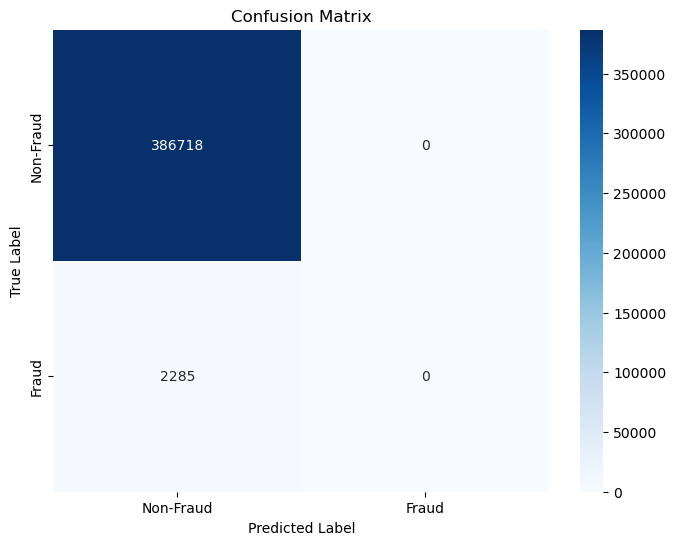

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict the values for the test set
y_pred = model.predict(X_test)

# Step 2: Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 3: Plot the confusion matrix using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [31]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'])
print(report)


c:\Users\reddo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\reddo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

   Non-Fraud       0.99      1.00      1.00    386718
       Fraud       0.00      0.00      0.00      2285

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003



c:\Users\reddo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



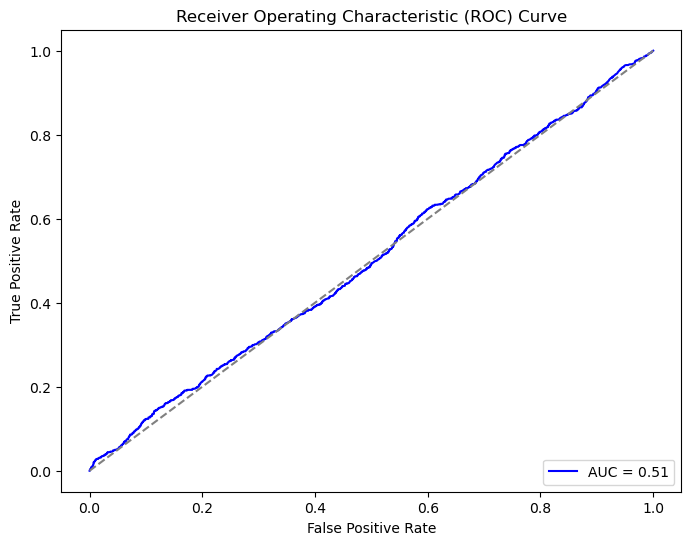

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Markdown by JBrooks - Fine Tune model using hyperparameter tuning and cross-validation

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization (L1 or L2)
    'solver': ['liblinear', 'saga']  # Solvers that support L1/L2 regularization
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {best_accuracy}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits


KeyboardInterrupt: 